In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Ignore Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [91]:
df_cnn = pd.read_csv("preprocessed_nov_23_df_cnn_topic_combined.csv")
df_cnn.shape

(1517, 11)

In [92]:
df_cnn.head()

,Unnamed: 0.2,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic,topicEncoded,tokenized_sentences,clean_text
0,0,0,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,another employee exodus appears underway twitt...,31.0,corporatenews,0,"['anoth', 'employe', 'exodu', 'appear', 'under...",anoth employe exodu appear underway twitter ma...
1,1,1,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,amazon ceo andy jassy said job cuts the e-comm...,36.0,corporatenews,0,"['amazon', 'ceo', 'andi', 'jassi', 'said', 'jo...",amazon ceo andi jassi said job cut e-commerc g...
2,2,2,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,max verstappen and red bull have hit out onlin...,37.0,corporatenews,0,"['max', 'verstappen', 'red', 'bull', 'hit', 'o...",max verstappen red bull hit onlin threat abus ...
3,3,3,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,here are things you need know today new york s...,45.0,corporatenews,0,"['thing', 'need', 'know', 'today', 'new', 'yor...",thing need know today new york snowstorm twitt...
4,4,4,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,riptwitter was the top trend worldwide thursda...,53.0,corporatenews,0,"['riptwitt', 'top', 'trend', 'worldwid', 'thur...",riptwitt top trend worldwid thursday even user...


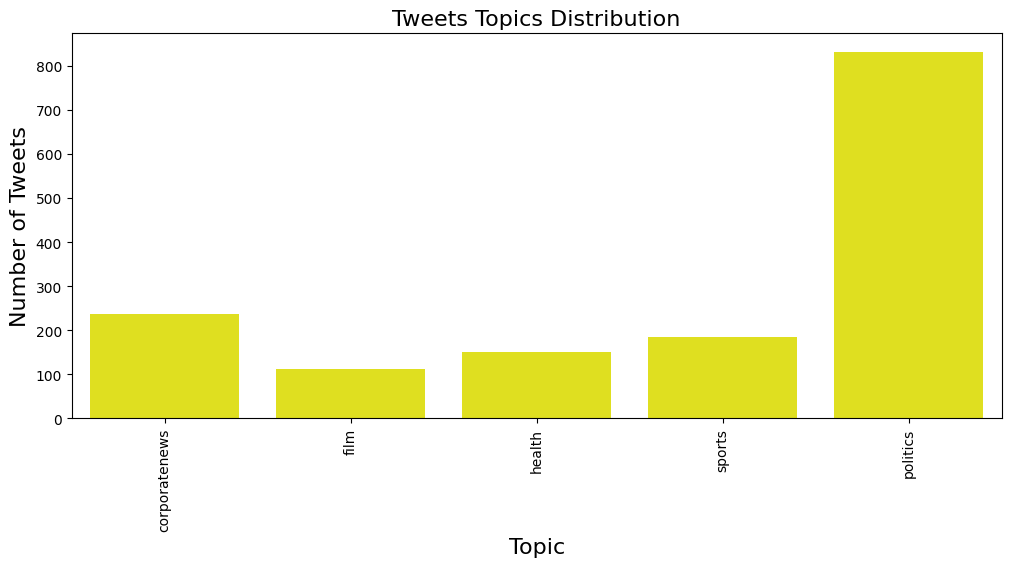

In [93]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_cnn.topic, color='yellow')
plt.title('Tweets Topics Distribution', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.xlabel('Topic', fontsize=16)
plt.xticks(rotation='vertical');

In [94]:
def print_evaluators(test,pred):
    print(classification_report(test,pred)) #Using classification_report function to get the summary of how good the classifier is 
    print(accuracy_score(test, pred)) #Using accuracy_score function to get the overall accuracy

# Training and Testing it on Left 

In [95]:
train_text, test_text, train_labels, test_labels = train_test_split(df_cnn["clean_text"], df_cnn["topicEncoded"], train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (1061,)
Train y size : (1061,)
Test x size : (456,)
Test y size : (456,)


In [96]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(train_text)
trainFeatureSet = countVector.transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [97]:
testFeatureSet.shape

(456, 2125)

In [98]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,train_labels)


LogisticRegression()

In [99]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,test_labels)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  92.76315789473685


In [100]:
print_evaluators(test_labels,predLogReg1)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        72
           1       1.00      0.77      0.87        26
           2       1.00      0.80      0.89        40
           3       0.90      0.99      0.95       255
           4       0.89      0.81      0.85        63

    accuracy                           0.93       456
   macro avg       0.96      0.86      0.90       456
weighted avg       0.93      0.93      0.93       456

0.9276315789473685


In [101]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [102]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,train_labels)

LogisticRegression()

In [103]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,test_labels)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  86.18421052631578


In [104]:
print_evaluators(test_labels,predLogReg2)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        72
           1       0.95      0.77      0.85        26
           2       0.96      0.60      0.74        40
           3       0.81      1.00      0.90       255
           4       0.95      0.57      0.71        63

    accuracy                           0.86       456
   macro avg       0.93      0.75      0.82       456
weighted avg       0.88      0.86      0.85       456

0.8618421052631579


# Training and Testing it on Right

In [105]:
df_fox = pd.read_csv("preprocessed_nov_23_df_fox_topic_combined.csv")
df_fox.shape

(1584, 11)

In [106]:
df_reuters = pd.read_csv("preprocessed_nov_23_df_reuters_topic_combined.csv")
df_reuters.shape

(1332, 11)

In [107]:
print(df_fox['topic'].value_counts())

politics         1051
sports            253
health            118
corporatenews     114
film               48
Name: topic, dtype: int64


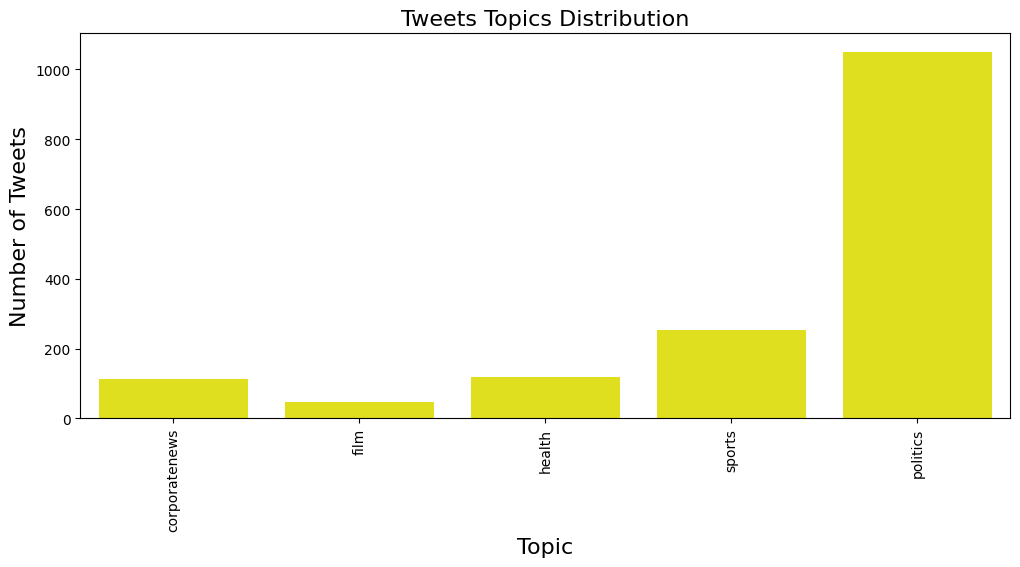

In [108]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_fox.topic, color='yellow')
plt.title('Tweets Topics Distribution', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.xlabel('Topic', fontsize=16)
plt.xticks(rotation='vertical');

In [109]:
train_text, test_text, train_labels, test_labels = train_test_split(df_fox["clean_text"], df_fox["topicEncoded"], train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (1108,)
Train y size : (1108,)
Test x size : (476,)
Test y size : (476,)


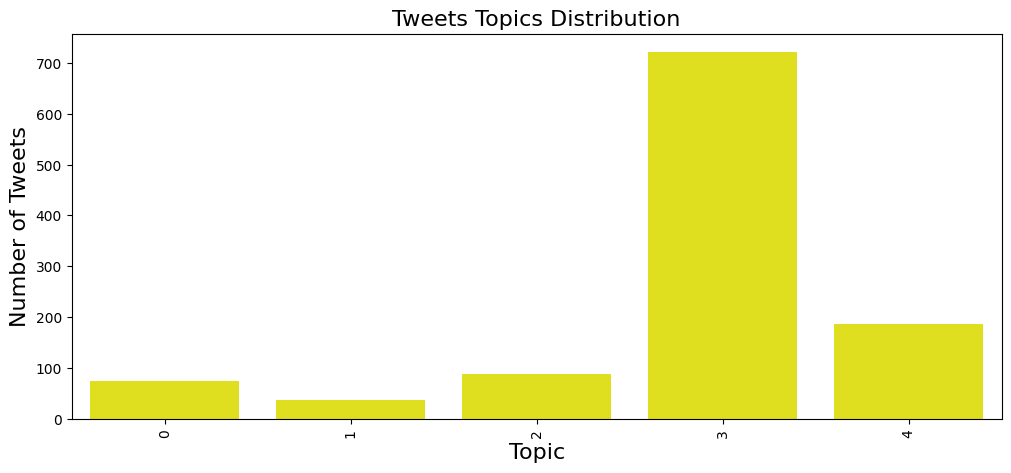

In [110]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_labels, color='yellow')
plt.title('Tweets Topics Distribution', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.xlabel('Topic', fontsize=16)
plt.xticks(rotation='vertical');

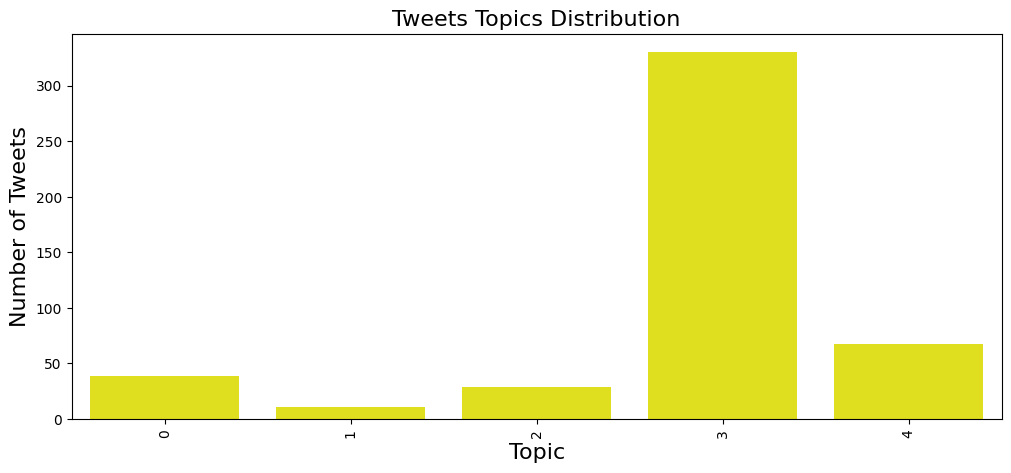

In [111]:
plt.figure(figsize=(12,5))
sns.countplot(x=test_labels, color='yellow')
plt.title('Tweets Topics Distribution', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.xlabel('Topic', fontsize=16)
plt.xticks(rotation='vertical');

In [112]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(train_text)
trainFeatureSet = countVector.transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [113]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,train_labels)

LogisticRegression()

In [114]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,test_labels)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  91.38655462184873


In [115]:
print_evaluators(test_labels,predLogReg1)

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       1.00      0.55      0.71        11
           2       0.89      0.59      0.71        29
           3       0.91      0.99      0.95       330
           4       0.92      0.85      0.88        67

    accuracy                           0.91       476
   macro avg       0.94      0.73      0.81       476
weighted avg       0.92      0.91      0.91       476

0.9138655462184874


In [116]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [117]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,train_labels)

LogisticRegression()

In [118]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,test_labels)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  87.39495798319328


In [119]:
print_evaluators(test_labels,predLogReg2)

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        39
           1       1.00      0.27      0.43        11
           2       0.83      0.34      0.49        29
           3       0.85      0.99      0.92       330
           4       0.96      0.78      0.86        67

    accuracy                           0.87       476
   macro avg       0.93      0.60      0.69       476
weighted avg       0.88      0.87      0.86       476

0.8739495798319328


# Training it on Left and Testing it on Right

In [120]:
X_left=df_cnn['clean_text']
Y_left=df_cnn['topicEncoded']
X_Right=df_fox['clean_text']
Y_Right =df_fox['topicEncoded']
X_neutral=df_reuters['clean_text']
Y_neutral=df_reuters['topicEncoded']

In [121]:
X_left.head()

0    anoth employe exodu appear underway twitter ma...
1    amazon ceo andi jassi said job cut e-commerc g...
2    max verstappen red bull hit onlin threat abus ...
3    thing need know today new york snowstorm twitt...
4    riptwitt top trend worldwid thursday even user...
Name: clean_text, dtype: object

In [122]:
Y_left.head()

0    0
1    0
2    0
3    0
4    0
Name: topicEncoded, dtype: int64

In [123]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_left)
trainFeatureSet = countVector.transform(X_left)
testFeatureSet = countVector.transform(X_Right)

In [124]:
trainFeatureSet.shape

(1517, 2633)

In [125]:
testFeatureSet.shape

(1584, 2633)

In [126]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_left)

LogisticRegression()

In [127]:
Y_Right.shape

(1584,)

In [128]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_Right)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  91.41414141414141


In [129]:
print_evaluators(Y_Right,predLogReg1)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       114
           1       0.94      0.71      0.81        48
           2       0.96      0.67      0.79       118
           3       0.90      0.99      0.94      1051
           4       0.93      0.78      0.85       253

    accuracy                           0.91      1584
   macro avg       0.95      0.80      0.86      1584
weighted avg       0.92      0.91      0.91      1584

0.9141414141414141


In [130]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_left)
tfidTestFeatures = tfIdVector.transform(X_Right)

In [131]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_left)

LogisticRegression()

In [132]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_Right)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  85.79545454545455


In [133]:
print_evaluators(Y_Right,predLogReg2)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       114
           1       1.00      0.52      0.68        48
           2       0.94      0.42      0.58       118
           3       0.83      1.00      0.91      1051
           4       0.96      0.61      0.75       253

    accuracy                           0.86      1584
   macro avg       0.95      0.65      0.75      1584
weighted avg       0.88      0.86      0.84      1584

0.8579545454545454


# Train on Left adn test it on nuetral

In [134]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_left)
trainFeatureSet = countVector.transform(X_left)
testFeatureSet = countVector.transform(X_neutral)

In [135]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_left)

LogisticRegression()

In [136]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_neutral)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  78.6036036036036


In [137]:
print_evaluators(Y_neutral,predLogReg1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       299
           1       0.79      0.62      0.69       107
           2       0.93      0.54      0.68       213
           3       0.66      0.98      0.79       441
           4       0.91      0.74      0.82       272

    accuracy                           0.79      1332
   macro avg       0.85      0.73      0.77      1332
weighted avg       0.83      0.79      0.78      1332

0.786036036036036


In [138]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_left)
tfidTestFeatures = tfIdVector.transform(X_neutral)

In [139]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_left)

LogisticRegression()

In [140]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_neutral)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  72.37237237237237


In [141]:
print_evaluators(Y_neutral,predLogReg2)

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       299
           1       0.89      0.46      0.60       107
           2       0.97      0.41      0.58       213
           3       0.56      0.99      0.72       441
           4       0.93      0.64      0.76       272

    accuracy                           0.72      1332
   macro avg       0.86      0.64      0.70      1332
weighted avg       0.82      0.72      0.72      1332

0.7237237237237237


# Training on Right and test it on left

In [142]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_Right)
trainFeatureSet = countVector.transform(X_Right)
testFeatureSet = countVector.transform(X_left)

In [143]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_Right)

LogisticRegression()

In [144]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_left)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  83.78378378378379


In [145]:
print_evaluators(Y_left,predLogReg1)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       237
           1       0.88      0.40      0.55       113
           2       0.90      0.74      0.81       151
           3       0.82      0.97      0.89       832
           4       0.78      0.82      0.80       184

    accuracy                           0.84      1517
   macro avg       0.87      0.72      0.77      1517
weighted avg       0.85      0.84      0.83      1517

0.8378378378378378


In [146]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_Right)
tfidTestFeatures = tfIdVector.transform(X_left)

In [147]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_Right)

LogisticRegression()

In [148]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_left)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  74.55504284772577


In [149]:
print_evaluators(Y_left,predLogReg2)

              precision    recall  f1-score   support

           0       0.98      0.45      0.62       237
           1       0.95      0.17      0.29       113
           2       0.93      0.47      0.63       151
           3       0.70      1.00      0.82       832
           4       0.87      0.58      0.69       184

    accuracy                           0.75      1517
   macro avg       0.89      0.53      0.61      1517
weighted avg       0.80      0.75      0.71      1517

0.7455504284772577


# Train on Right and Test on Neutral

In [150]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_Right)
trainFeatureSet = countVector.transform(X_Right)
testFeatureSet = countVector.transform(X_neutral)

In [151]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_Right)

LogisticRegression()

In [152]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_neutral)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  73.64864864864865


In [153]:
print_evaluators(Y_neutral,predLogReg1)

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       299
           1       0.94      0.42      0.58       107
           2       0.97      0.58      0.72       213
           3       0.59      0.98      0.74       441
           4       0.85      0.79      0.82       272

    accuracy                           0.74      1332
   macro avg       0.86      0.66      0.71      1332
weighted avg       0.81      0.74      0.73      1332

0.7364864864864865


In [154]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_Right)
tfidTestFeatures = tfIdVector.transform(X_neutral)

In [155]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_Right)

LogisticRegression()

In [156]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_neutral)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  64.33933933933935


In [157]:
print_evaluators(Y_neutral,predLogReg2)

              precision    recall  f1-score   support

           0       0.98      0.41      0.58       299
           1       0.96      0.23      0.38       107
           2       0.99      0.42      0.59       213
           3       0.50      0.99      0.66       441
           4       0.88      0.67      0.76       272

    accuracy                           0.64      1332
   macro avg       0.86      0.55      0.59      1332
weighted avg       0.80      0.64      0.63      1332

0.6433933933933934


# Train on Nuetral and Test on Nuetral

In [158]:
train_text, test_text, train_labels, test_labels = train_test_split(X_neutral, Y_neutral, train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (932,)
Train y size : (932,)
Test x size : (400,)
Test y size : (400,)


In [159]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(train_text)
trainFeatureSet = countVector.transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [160]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,train_labels)

LogisticRegression()

In [161]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,test_labels)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  93.5


In [162]:
print_evaluators(test_labels,predLogReg1)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.93      0.83      0.88        30
           2       1.00      0.83      0.91        70
           3       0.89      0.99      0.93       142
           4       0.98      0.97      0.97        87

    accuracy                           0.94       400
   macro avg       0.95      0.91      0.93       400
weighted avg       0.94      0.94      0.93       400

0.935


In [163]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [164]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,train_labels)

LogisticRegression()

In [165]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,test_labels)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  88.25


In [166]:
print_evaluators(test_labels,predLogReg2)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        71
           1       1.00      0.67      0.80        30
           2       0.98      0.64      0.78        70
           3       0.82      0.99      0.89       142
           4       0.94      0.92      0.93        87

    accuracy                           0.88       400
   macro avg       0.92      0.83      0.86       400
weighted avg       0.90      0.88      0.88       400

0.8825


# Train on neutral and test on left

In [167]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_neutral)
trainFeatureSet = countVector.transform(X_neutral)
testFeatureSet = countVector.transform(X_left)

In [168]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_neutral)

LogisticRegression()

In [169]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_left)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  82.59723137771918


In [170]:
print_evaluators(Y_left,predLogReg1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       237
           1       0.93      0.58      0.72       113
           2       0.63      0.66      0.64       151
           3       0.84      0.96      0.90       832
           4       0.84      0.48      0.61       184

    accuracy                           0.83      1517
   macro avg       0.82      0.71      0.74      1517
weighted avg       0.83      0.83      0.82      1517

0.8259723137771918


In [171]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_neutral)
tfidTestFeatures = tfIdVector.transform(X_left)

In [172]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_neutral)

LogisticRegression()

In [173]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_left)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  80.75148319050757


In [174]:
print_evaluators(Y_left,predLogReg2)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       237
           1       0.98      0.49      0.65       113
           2       0.74      0.54      0.62       151
           3       0.81      0.98      0.89       832
           4       0.81      0.41      0.54       184

    accuracy                           0.81      1517
   macro avg       0.83      0.65      0.70      1517
weighted avg       0.81      0.81      0.79      1517

0.8075148319050758


# Train on neutral and test on Right

In [175]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(X_neutral)
trainFeatureSet = countVector.transform(X_neutral)
testFeatureSet = countVector.transform(X_Right)

In [176]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,Y_neutral)

LogisticRegression()

In [177]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,Y_Right)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  85.35353535353535


In [178]:
print_evaluators(Y_Right,predLogReg1)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       114
           1       0.96      0.50      0.66        48
           2       0.68      0.62      0.65       118
           3       0.86      0.98      0.92      1051
           4       0.92      0.57      0.70       253

    accuracy                           0.85      1584
   macro avg       0.85      0.68      0.74      1584
weighted avg       0.86      0.85      0.84      1584

0.8535353535353535


In [179]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(X_neutral)
tfidTestFeatures = tfIdVector.transform(X_Right)

In [180]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,Y_neutral)

LogisticRegression()

In [181]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,Y_Right)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  82.38636363636364


In [182]:
print_evaluators(Y_Right,predLogReg2)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       114
           1       1.00      0.44      0.61        48
           2       0.71      0.45      0.55       118
           3       0.83      0.98      0.90      1051
           4       0.86      0.47      0.61       253

    accuracy                           0.82      1584
   macro avg       0.83      0.61      0.68      1584
weighted avg       0.83      0.82      0.81      1584

0.8238636363636364
